In [392]:
import numpy as np
import matplotlib.pyplot as plt

# CANTOR SET

## 1. Set theory history


Set Theory is a branch of logical mathematics that studies the collection of objects and operations based on it. The modern study of set theory was initiated by the German mathematicians Richard Dedekind and Georg Cantor in the 1870s. In particular, Georg Cantor is commonly considered the founder of set theory. [[1]](#bibliography1) 

This theory grew out of his investigations of some concrete problems regarding certain types of infinite sets of real numbers. In 1873 Cantor demonstrated that the rational numbers, though infinite, are countable (or denumerable) because they may be placed in a one-to-one correspondence with the natural numbers (i.e., the integers, as 1, 2, 3,…). He showed that the set (or aggregate) of real numbers (composed of irrational and rational numbers) was infinite and uncountable. Even more paradoxically, he proved that the set of all algebraic numbers contains as many components as the set of all integers and that transcendental numbers (those that are not algebraic, as π), which are a subset of the irrationals, are uncountable and are therefore more numerous than integers, which must be conceived as infinite.

But Cantor’s paper, in which he first put forward these results, was refused for publication in "Crelle’s Journal" by one of its referees, Kronecker, who furiously opposed his work. On Dedekind’s intervention, however, it was published in 1874 as “Über eine Eigenschaft des Inbegriffes aller reellen algebraischen Zahlen” (“On a Characteristic Property of All Real Algebraic Numbers”).[[2]](#bibliography2) 

The theory had the revolutionary aspect of treating infinite sets as mathematical objects that are on an equal footing with those that can be constructed in a finite number of steps. Since antiquity, a majority of mathematicians had carefully avoided the introduction into their arguments of the actual infinite (i.e., of sets containing an infinity of objects conceived as existing simultaneously, at least in thought). Since this attitude persisted until almost the end of the 19th century, Cantor’s work was the subject of much criticism to the effect that it dealt with fictions—indeed, that it encroached on the domain of philosophers and violated the principles of religion. Once applications to analysis began to be found, however, attitudes began to change, and by the 1890s Cantor’s ideas and results were gaining acceptance. By 1900, set theory was recognized as a distinct branch of mathematics. [[3]](#bibliography3) 

## 2. What is Cantor set

The Cantor (ternary) set was first published in 1883 by German mathematician Georg Cantor. The Cantor set plays a very important role in many branches of mathematics, above all in set theory, chaotic dynamical systems and fractal theory.  

In mathematics, the Cantor set is a set of points lying on a single line segment, that has a number of unintuitive properties. Through consideration of this set, Cantor and others helped lay the foundations of modern point-set topology. The Cantor set is a classic example of a fractal and is constructed by repeatedly removing the middle third of a line segment and then repeating the process with the remaining shorter segments.[[4]](#bibliography4) 

### 2.1. Cantor ternary set construction

The basic Cantor (ternary) set is a subset of the interval  $ \big[0, 1 \big] $ and has many definitions and many different constructions. Although Cantor originally provided a purely abstract definition, the most accessible is the „middle-thirds“ or ternary set construction.

The Cantor ternary set $ 𝐶 $ is created by iteratively deleting the open middle third from a set of line segments.

1. Lets start with the closed interval $ \big[0, 1 \big] $, representing all real numbers between $ 0 $ and $ 1 $.
   $$ C_{0} = \big[0, 1 \big] $$
   
2. Then remove the open middle third $ \big(\frac{1}{3}, \frac{2}{3} \big) $, leaving two line segments: $ \big[0, \frac{1}{3} \big] $  and $ \big[\frac{2}{3}, 1 \big] $ 

   $$ C_{1} = \bigg[0, \frac{1}{3} \bigg] \cup \bigg[\frac{2}{3}, 1 \bigg] $$
   
3. Next, the open middle third of each of these remaining segments is deleted, leaving four line segments:
   $$ C_{2} = \bigg[0, \frac{1}{9} \bigg] \cup \bigg[\frac{2}{9}, \frac{1}{3} \bigg] \cup \bigg[\frac{2}{3}, \frac{7}{9} \bigg] \cup \bigg[\frac{8}{9}, 1 \bigg]$$
   
3. Continue removing the middle third of each interval in $ C_{n} $

4. Continue this process infinitely. The set of points left out in this process is called the “Cantor Set”. This set is also known as the “Cantor Ternary Set” and “Cantor Middle Third Set”.
   $$ C = \bigcap_{n = 0}^\infty C_{n} $$

In [398]:
'''
Splits the interval into 2 sub-intervals, by removing the middle open third
    - accepts interval [a, b]
    - returns a list wtih interval
'''
def remove_middle_third(interval):
    a, b = interval
    x = (2 * a + b) / 3
    y = (a + 2 * b) / 3
    
    return [[a, x], [y, b]]

In [400]:
'''
starts with initial interval [0, 1] and continue splitting the intervals to sub-intervals
    - accepts n - number of iterations
    - returns a list wtih sub-intervals, by removing the open middle third for 'n' iterations
'''
def cantor_set(n):
    interval = [[0, 1]]
    
    for i in range(n):
        result = list()
        
        for sub_set in interval:
            result.extend(remove_middle_third(sub_set))
        interval = result
        
    return interval

In [402]:
cantor_set(0)

[[0, 1]]

In [404]:
cantor_set(1)

[[0, 0.3333333333333333], [0.6666666666666666, 1]]

In [406]:
cantor_set(2)

[[0, 0.1111111111111111],
 [0.2222222222222222, 0.3333333333333333],
 [0.6666666666666666, 0.7777777777777777],
 [0.8888888888888888, 1]]

In [408]:
cantor_set(3)

[[0, 0.037037037037037035],
 [0.07407407407407407, 0.1111111111111111],
 [0.2222222222222222, 0.25925925925925924],
 [0.2962962962962963, 0.3333333333333333],
 [0.6666666666666666, 0.7037037037037036],
 [0.7407407407407406, 0.7777777777777777],
 [0.8888888888888888, 0.9259259259259259],
 [0.9629629629629629, 1]]

In [410]:
'''
plots a single line
'''
def plot_interval_line(interval, level, line_width = 10):
    plt.plot(interval, [level, level], color = "black", linewidth = line_width, solid_capstyle = "butt")

In [412]:
'''
sets plot configs:
    - chart title
    - x axis label
    - y axis label
'''

def set_plot(title, x_label, y_label, n):
    plt.title(title)
    plt.yticks(range(n))
    plt.gca().invert_yaxis()
    plt.xlabel(x_label)
    plt.ylabel(y_label)

In [414]:
'''
plots Cantor set for 'n' iterations
    - n - number of iterations
'''
def plot_cantor_set(n):
    level = 0
    
    while level <= n:
        for interval in cantor_set(level):
            plot_interval_line(interval, level)
        
        level += 1
    
    plot_title = 'Cantor Set (removing middle third) - C({n})'.format(n=n)
    set_plot(plot_title, 'interval', 'iteration', n)
    
    plt.show()

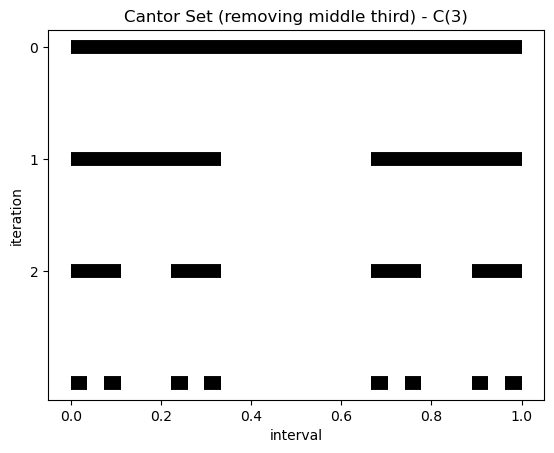

In [416]:
plot_cantor_set(3)

The process can continue and for each iteration to remove the midle third.

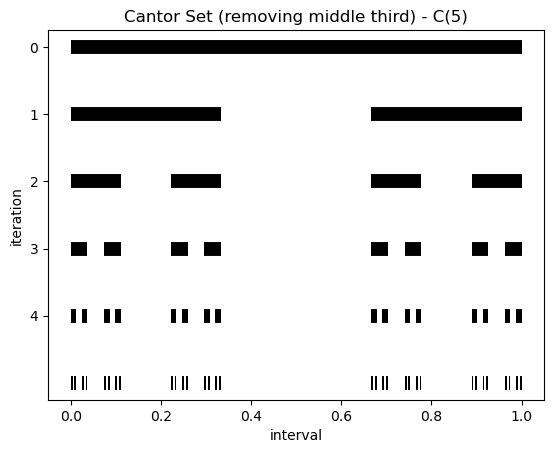

In [419]:
plot_cantor_set(5)

## 3. Properties of the Cantor set [[5]](#bibliography5) 

### 3.1. Uncountable

**Theorem 2.** The standard Cantor set is uncountable.

Proof:
One of the most notable properties of the standard Cantor set is that it contains uncountably many points. This is despite $ C $ being very small in that it is the result of an intersection of countably many decreasing sets.

First, consider every element of $ C $ in its ternary representation. Supposing the standard Cantor set is countable, then there is a listing of all the elements of $ C $, for instance:
0.200200222...,
0.002202002...,
0.202220002...,
0.002020200...,
...
Now, construct a new element by swapping the nth decimal digit of the nth element in the list from either 0 to 2 or 2 to 0. In this case the new element is 0.0202..., which is different from any existing element in the list. However, by the above theorem, this new number must also be in $ C $, which contradicts that we had listed all elements of $ C $. Therefore, it is impossible to find a complete enumeration of all the elements in the standard Cantor set, so it must be uncountable. Note that this is very similar to the common diagonalization argument which shows that $ \mathbb{R} $ is uncountable.

### 3.2. Closed

**Theorem 3.** The standard Cantor set is closed.

Proof:
The Cantor set is an intersection of countably many sets, each of which is a finite union of closed intervals, so closed itself. Thus, the standard Cantor set is
the intersection of countably many closed sets, which implies it is closed.

### 3.3. Nowhere dense

**Theorem 4.** The standard Cantor set is nowhere dense.

Proof:
We have shown the Cantor set is closed, so its closure is itself. Suppose a subset of the Cantor set is dense, then the subset contains at least one interval,
denoted as $ A = [a, b] $, where $ a \ge 0 $ and $ b \ge 1 (a, b \in \mathbb{R}, a < b) $. Written in base 3, both a and b are composed of only 0 and 2,
given that the two points are both in the Cantor set. Now, locate the first from left decimal digit that $ a $ and $ b $ differ from each other and replace it with a 1. For example, if $ a = 0.20202... $ and $ b = 0.20222... $ in base, then let $ c = 0.2021... $ in base 3,  where the remaining digits don’t really matter. Since the first 3 digits of $ a $, $ b $, and $ c $ are the same, we are able to argue that $ a < c < b $ and that $ c $ is not in the ternary Cantor set since it contains the digit 1. A contradiction is therefore achieved, and the Cantor set is nowhere dense. 

### 3.4. Totally disconnected

**Theorem 5.** The standard Cantor set is totally disconnected.

Proof:
A totally disconnected space is a topological space that has no non-trivial connected subsets. In other words, the only connected components in any totally disconnected space $ X $ are the one-point sets.

Specifically, any two elements of the standard Cantor set are separated by at least one point not
in $ C $. If this is the case, no two distinct points can be part of the same connected component, so the set is totally disconnected.

### 3.5. Consists of exactly those numbers in $ [0, 1] $ that can be written in base 3 without 1s.

**Theorem 1.** The standard Cantor set consists of exactly those numbers in $ [0, 1] $ that can be written in base 3 without 1s.

Proof:
Lets begin by showing that the standard Cantor set only consists of such elements:

Write all numbers from the unit interval in base 3. For instance, the number 0.25 in base 10 is written in base 3 as 0.020202... . If a number can be written using only 0 and 2, consider the latter representation of it. For instance, the number 0.1 in base three is the same as 0.022222... in base three. It is easy to check that .1 is in the standard Cantor set, which is why lets consider it represented as .022222... 
proceeding by induction, starting with the base case: those in C1 are either smaller than $ \frac{1}{3} $ or bigger than $ \frac{1}{3} $. Therefore, their first decimal digits are either 0 or 2.

Now, the inductive step: suppose all elements in $ C_{n} $ can be written in base 3 with only 0 and 2 in the first $ n $ decimal places. Then since $ C_{n+1} = \frac{C{n}}{3} \cup \big ( \frac{2}{3} + \frac{C_{n}}{3} \big ) $ for $ n \ge 1 $, we deduce that all elements in $ C_{n+1} $ can be written in base 3 with only 0 and 2 on the first $ n + 1 $ decimal places. Specifically, their 2 to $ (n + 1) $ digits are copied from the 1 to $ n $ digits of the corresponding elements in $ C_{n} $, and the firs digit is either 0 or 2 depending on whether they belong to the left or right portion of the Cantor set.

Supposing that there is any 1 that appears in the ternary representation of an element in the Cantor set, it would have to appear in a certain place, say the $ k  $ th digit. This is impossible by the above induction, which gives that there is no digit where a 1 can appear.

Now for the other direction, we want to show by induction that all the numbers in $ [0, 1] $ that can be written in base-3 without 1’s are in the standard Cantor set.

For the base case, we know that all the numbers in $ [0, 1]$ that are written base 3 with either 0 or 2 in the first decimal digit are in $ C_{1} $, since all the numbers in $ [0, \frac{1}{3}] $ have a 0 as the first digit of their ternary representation (writing 1/3 = .0222...), and all the numbers in $ [\frac{2}{3}, 1] $ have a 2 as the first digit (writing 1 = .222).

Now, suppose all numbers that can be written in base 3 with only 0 and 2 on the first n decimal places are in $ C_{n} $. Now, we take out from these elements those that have a 1 in the $ n + 1 $th decimal place. then we see all the remaining numbers are in $ C_{n+1} $, $ C_{n+1} = \frac{C{n}}{3} \cup \big ( \frac{2}{3} + \frac{C_{n}}{3} \big ) $ for $ n \ge 1 $. If a number has no 1 in its ternary, there will be no $ C_{k} $ which it doesn’t appear in, so it will be in $ C $, the intersection of all $ C_{k} $.

## 4. Cantor set variations

### 4.1. Smith–Volterra–Cantor set

In mathematics, the Smith–Volterra–Cantor set (SVC), or **fat Cantor set** is an example of a set of points on the real line that is nowhere dense (in particular it contains no intervals), yet has positive measure. The Smith–Volterra–Cantor set is named after the mathematicians Henry Smith, Vito Volterra and Georg Cantor. The Smith–Volterra–Cantor set is topologically equivalent to the middle-thirds Cantor set.

Similar to the construction of the Cantor set, the Smith–Volterra–Cantor set is constructed by removing certain intervals from the unit interval $[0, 1] $. The process begins by removing the middle $ \frac{1}{4} $ from the interval (the same as removing $ \frac{1}{8} $ on either side of the middle point at $ \frac{1}{2} $) so the remaining set is:
$$ \bigg[0, \frac{3}{8} \bigg] \cup \bigg[\frac{5}{8}, 1 \bigg] $$

The following steps consist of removing subintervals of width $ \frac{1}{4^n} $ from the middle of each $ 2^{n - 1} $ of the remaining intervals. So for the second step the intervals $ ( \frac{5}{32},  \frac{7}{32} ) $ and $ ( \frac{25}{32},  \frac{27}{32} ) $ are removed, leaving:
$$ \bigg[0, \frac{5}{32} \bigg] \cup \bigg[\frac{7}{32}, \frac{3}{8} \bigg]  \cup \bigg[\frac{5}{8}, \frac{25}{32} \bigg] \cup \bigg[\frac{27}{32}, 1 \bigg] $$

Continuing indefinitely with this removal, the Smith–Volterra–Cantor set is then the set of points that are never removed. 

Each subsequent iterate in the Smith–Volterra–Cantor set's construction removes proportionally less from the remaining intervals. This stands in contrast to the Cantor set, where the proportion removed from each interval remains constant. Thus, the Smith–Volterra–Cantor set has positive measure while the Cantor set has zero measure. [[6]](#bibliography6)

In [429]:
'''
Splits the interval into 2 sub-intervals, by removing the middle open forths
    - accepts interval [a, b]
    - returns a list wtih interval
'''
def remove_middle_forths(interval, n):
    a, b = interval
    mid = (b - a) / 2
    delim = 8 * n * n
    
    x = a + mid - (1 / delim)
    y = a + mid + (1 / delim)
    
    return [[a, x], [y, b]]

In [431]:
'''
starts with initial interval [0, 1] and continue splitting the intervals to sub-intervals
    - accepts n - number of iterations
    - returns a list wtih sub-intervals, by removing the open middle forths, for 'n' iterations
'''
def fat_cantor_set(n):
    interval = [[0, 1]]
    
    for i in range(n):
        result = list()
        
        for sub_set in interval:
            result.extend(remove_middle_forths(sub_set, i + 1))
        interval = result
        
    return interval

In [433]:
fat_cantor_set(0)         #[[0, 1]]

[[0, 1]]

In [435]:
fat_cantor_set(1)         #[[0, 0.375], [0.625, 1]]

[[0, 0.375], [0.625, 1]]

In [437]:
fat_cantor_set(2)         #[[0, 0.15625], [0.21875, 0.375], [0.625, 0.78125], [0.84375, 1]]

[[0, 0.15625], [0.21875, 0.375], [0.625, 0.78125], [0.84375, 1]]

In [439]:
'''
plots Fat Cantor set for 'n' iterations
    - n - number of iterations
'''
def plot_cantor_set_fat(n):
    level = 0
    
    while level <= n:
        for interval in fat_cantor_set(level):
            plot_interval_line(interval, level,20)
        
        level += 1
    
    plot_title = 'Fat Cantor Set - C({n})'.format(n=n)
    set_plot(plot_title, 'interval', 'iteration', n)
    plt.show()

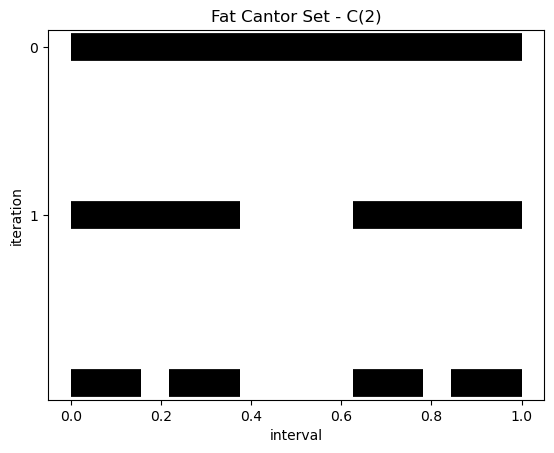

In [441]:
plot_cantor_set_fat(2)

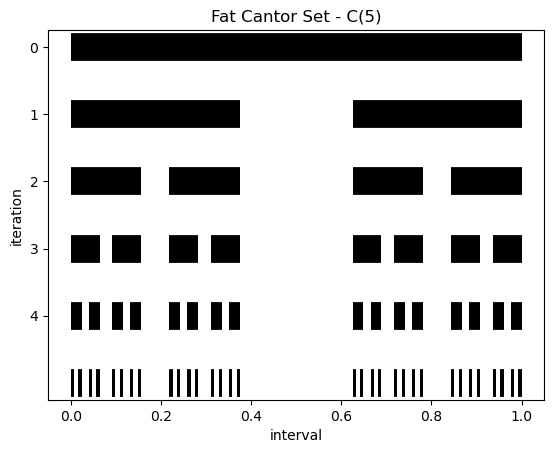

In [443]:
plot_cantor_set_fat(5)

### 4.2. Cantor dust 

Cantor dust is a multi-dimensional version of the Cantor set. It can be formed by taking a finite Cartesian product of the Cantor set with itself, making it a Cantor space. Like the Cantor set, Cantor dust has zero measure. 

A different 2D analogue of the Cantor set is the Sierpinski carpet, where a square is divided up into nine smaller squares, and the middle one removed. The remaining squares are then further divided into nine each and the middle removed, and so on ad infinitum.[[7]](#bibliography7)

**Example for 2D Cantor dust:**

Cantor dust is a two-dimensional fractal figure generated beginning with a square; with each iteration, remove the middle third horizontal and vertical stripe of each square in the figure. 

<img src="./2D_cantor_dust.png" alt="2D cantor dust" width="600" style="margin: 0 auto"/>

**Example for 3D Cantor dust:**

The same process can be carried out in three dimensions:

<img src="./3D_cantor_dust.png" alt="3D cantor dust" width="600" style="margin: 0 auto"/>

## 5. Cantor set application in analysis

### 5.1. Cantor function

In mathematics, the  Cantor function is an example of a function that is continuous, but not absolutely continuous. It is a notorious counterexample in analysis, because it challenges naive intuitions about continuity, derivative, and measure. Though it is continuous everywhere and has zero derivative almost everywhere, its value still goes from 0 to 1 as its argument reaches from 0 to 1. Thus, in one sense the function seems very much like a constant one which cannot grow, and in another, it does indeed monotonically grow.

It is also called the Cantor ternary function, the Lebesgue function Lebesgue's singular function, the Cantor–Vitali function, the Devil's staircase, the Cantor staircase function and the Cantor–Lebesgue function. Georg Cantor (1884) introduced the Cantor function and mentioned that Scheeffer pointed out that it was a counterexample to an extension of the fundamental theorem of calculus claimed by Harnack. The Cantor function was discussed and popularized by Scheeffer (1884), Lebesgue (1904) and Vitali (1905).[[8]](#bibliography8)

The Cantor function is closely related to the Cantor set. The Cantor set $ C $ can be defined as the set of those numbers in the interval $ \big[0, 1 \big] $ that do not contain the digit 1 in their base-3 expansion, except if the 1 is followed by zeros only (in which case the tail 1000... can be replaced by 0222... to get rid of any 1). It turns out that the Cantor set is a fractal with (uncountably) infinitely many points (zero-dimensional volume), but zero length (one-dimensional volume). Only the D-dimensional volume $ H_{D} $ (in the sense of a Hausdorff-measure) takes a finite value, where $ D = \frac{\log(2)}{\log(3)} $ is the fractal dimension of $ C $. We may define the Cantor function alternatively as the D-dimensional volume of sections of the Cantor set $$ f(x) = H_{D}(C \cap (0, x)) $$

### 5.2. Cantor funtion algorithm

The standard Cantor function, or the Cantor ternary function $ C $ : $ \big[0, 1 \big] $ → $ \big[0, 1 \big] $ is defined as follows:
1. Express x in base 3.
2. If x contains a 1, replace every digit strictly after the first 1 by 0.
3. Replace any remaining 2s before the 1 with 1s.
4. Interpret the result in binary.

In [449]:
def split_interval(interval):
    a, b = interval
    x = (a + b) / 2
    
    return [[a, x], [x, b]]

In [451]:
'''
splits the [0, 1] interval to 2 * n equal parts
'''
def get_intervals(n):
    interval = [[0,1]]
    
    for i in range(n):
        result = list()
        
        for sub_set in interval:
            result.extend(split_interval(sub_set))
        interval = result
        
    return interval

In [453]:
get_intervals(0)

[[0, 1]]

In [455]:
get_intervals(1)

[[0, 0.5], [0.5, 1]]

In [457]:
get_intervals(2)

[[0, 0.25], [0.25, 0.5], [0.5, 0.75], [0.75, 1]]

In [459]:
get_intervals(3)

[[0, 0.125],
 [0.125, 0.25],
 [0.25, 0.375],
 [0.375, 0.5],
 [0.5, 0.625],
 [0.625, 0.75],
 [0.75, 0.875],
 [0.875, 1]]

In [461]:
'''
plots Cantor function points
'''
def get_points(n):
    x_points = list()
    y_points = list()
    intervals = zip(cantor_set(n), get_intervals(n))
    
    for x, y in intervals:
        x_points.extend(x)
        y_points.extend(y)
        
    return np.array(x_points), np.array(y_points)

In [463]:
'''
plots Cantor function for n iterations
'''
def cantor_function(n):
    x_points, y_points = get_points(n)
    plt.plot(x_points, y_points, color='blue')
        
    plt.title('Cantor Function ({n})'.format(n=n))
    plt.xlim([-0.1, 1.1])
    plt.ylim([-0.1, 1.1])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

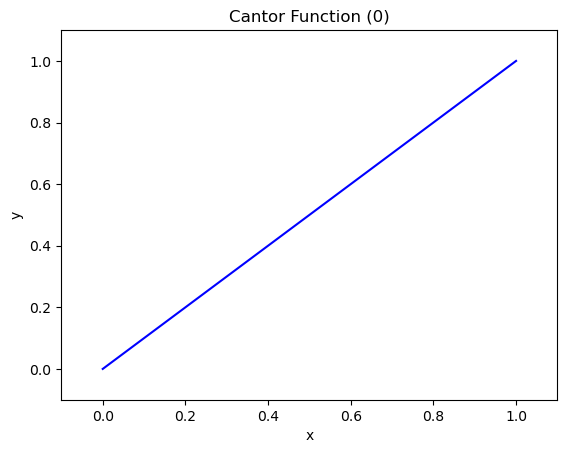

In [465]:
cantor_function(0)

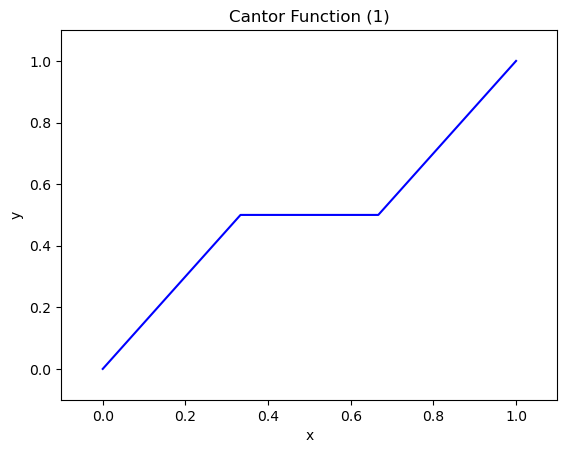

In [467]:
cantor_function(1)

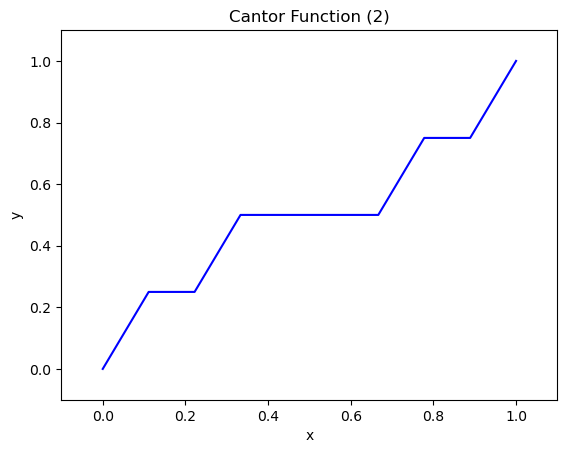

In [469]:
cantor_function(2)

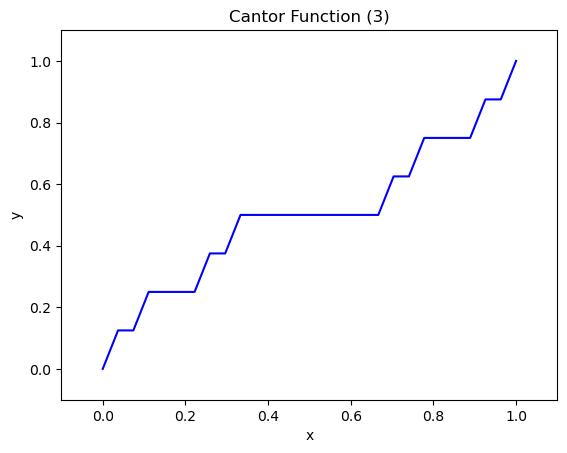

In [471]:
cantor_function(3)

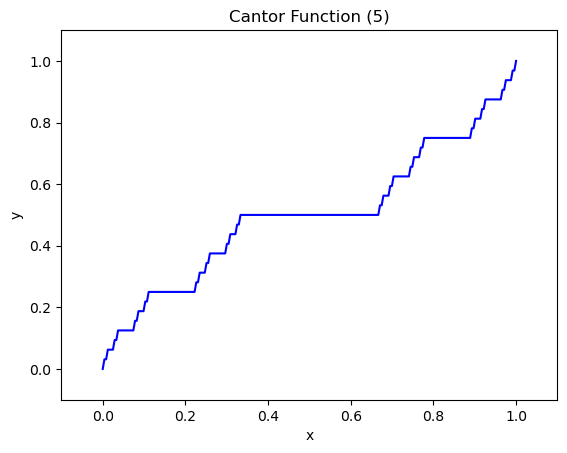

In [473]:
cantor_function(5)

## 6. Cantor set application in real word

The Cantor set, despite its seemingly abstract mathematical construction, has intriguing applications across various fields. Here are some notable real-world applications:

1. **Signal Processing and Telecommunications:**

In signal processing, the Cantor set can be used to create signals with specific fractal properties. These signals are useful in telecommunications for their resilience to noise and efficient transmission characteristics.

2. **Fractal Antennas:**

Antennas designed using fractal geometry, including principles inspired by the Cantor set, exhibit multi-band or broadband properties. They are compact and efficient, making them suitable for modern wireless communication systems.

3. **Compression Algorithms:**

Fractal-based compression algorithms utilize self-similarity properties akin to those found in the Cantor set. These algorithms efficiently compress images and other data by encoding repeated patterns at different scales, reducing file sizes while retaining detail. [[9]](#bibliography9)

4. **Economics and Finance:**

The Cantor set's fractal nature has been applied to modeling financial time series, such as stock prices or currency exchange rates. Fractal analysis can capture long-range dependence and self-similar patterns in these data, aiding in risk assessment and market forecasting.

5. **Number Theory and Real Analysis:**

The Cantor set provides examples of perfect sets in real analysis and serves as a counterintuitive demonstration in number theory. It highlights the existence of uncountably infinite sets with zero measure, challenging conventional notions about size and density in mathematics.

6. **Control Systems and Chaos Theory:**

Systems exhibiting chaotic behavior, such as those described by fractal sets like the Cantor set, are studied in chaos theory and control systems. Understanding these dynamics is crucial for predicting and controlling complex systems in engineering and biology. [[10]](#bibliography10) 

7. **Computer Graphics and Visual Arts:**

Fractal geometry, including elements inspired by the Cantor set, is used in computer graphics to generate realistic natural scenes (such as landscapes) and intricate patterns. It also influences artistic expressions, providing tools for creating visually compelling designs and textures.

In essence, the Cantor set and its fractal properties have permeated diverse disciplines, offering insights and practical tools that leverage its unique mathematical characteristics in various real-world applications.

## Footnotes
1. *Line segment* - in geometry, a line segment is a part of a straight line that is bounded by two distinct end points, and contains every point on the line that is between its endpoints. It is a special case of an arc, with zero curvature. The length of a line segment is given by the Euclidean distance between its endpoints.
2. *Lebesgue measure* - In measure theory, a branch of mathematics, the Lebesgue measure, named after French mathematician Henri Lebesgue, is the standard way of assigning a measure to subsets of higher dimensional Euclidean n-spaces. For lower dimensions n = 1, 2, or 3, it coincides with the standard measure of length, area, or volume. In general, it is also called n-dimensional volume, n-volume, hypervolume, or simply volume. It is used throughout real analysis, in particular to define Lebesgue integration. Sets that can be assigned a Lebesgue measure are called Lebesgue-measurable; the measure of the Lebesgue-measurable set A is here denoted by λ(A).
3. Fractal antenna - an antenna that uses a fractal, self-similar design to maximize the effective length, or increase the perimeter (on inside sections or the outer structure), of material that can receive or transmit electromagnetic radiation within a given total surface area or volume.

## Bibliography

1. <sup id="bibliography1"></sup> Set theory - [https://en.wikipedia.org/wiki/Set_theory](https://en.wikipedia.org/wiki/Set_theory)
2. <sup id="bibliography2"></sup> Georg Cantor - [https://www.britannica.com/biography/Georg-Ferdinand-Ludwig-Philipp-Cantor](https://www.britannica.com/biography/Georg-Ferdinand-Ludwig-Philipp-Cantor)
3. <sup id="bibliography3"></sup> Set theory - [https://www.britannica.com/science/set-theory](https://www.britannica.com/science/set-theory)
4. <sup id="bibliography4"></sup> Cntor set - [https://en.wikipedia.org/wiki/Cantor_set#Historical_remarks](https://en.wikipedia.org/wiki/Cantor_set#Historical_remarks)
5. <sup id="bibliography5"></sup> Cantor set in topology, analysis and finacial markets - http://math.uchicago.edu/~may/REU2021/REUPapers/Jin,Alexa.pdf](http://math.uchicago.edu/~may/REU2021/REUPapers/Jin,Alexa.pdf)
6. <sup id="bibliography6"></sup> Smith–Volterra–Cantor set - [https://en.wikipedia.org/wiki/Smith%E2%80%93Volterra%E2%80%93Cantor_set](https://en.wikipedia.org/wiki/Smith%E2%80%93Volterra%E2%80%93Cantor_set)
7. <sup id="bibliography7"></sup> Cantor Dust - [https://www.robertdickau.com/cantor.html](https://www.robertdickau.com/cantor.html)
8. <sup id="bibliography8"></sup> Cantor function - [https://en.wikipedia.org/wiki/Cantor_function](https://en.wikipedia.org/wiki/Cantor_function)
9. <sup id="bibliography9"></sup> Lossless Data Compression with Error Detection using Cantor Set - [https://arxiv.org/pdf/1308.2299](https://arxiv.org/pdf/1308.2299)
10. <sup id="bibliography10"></sup> Cantor Set as a Fractal and Its Application in Detecting Chaotic Nature of Piecewise Linear Maps - [https://www.academia.edu/39617845/Cantor_Set_as_a_Fractal_and_Its_Application_in_Detecting_Chaotic_Nature_of_Piecewise_Linear_Maps](https://www.academia.edu/39617845/Cantor_Set_as_a_Fractal_and_Its_Application_in_Detecting_Chaotic_Nature_of_Piecewise_Linear_Maps)


11. Set theory - [https://plato.stanford.edu/entries/set-theory/](https://plato.stanford.edu/entries/set-theory/)
12. Line segment - [https://en.wikipedia.org/wiki/Line_segment](https://en.wikipedia.org/wiki/Line_segment)
13. Lebesgue measure - [https://en.wikipedia.org/wiki/Lebesgue_measure](https://en.wikipedia.org/wiki/Lebesgue_measure)
14. The Cantor set - a brief introduction - [https://www.math.uwaterloo.ca/~xzliu/cantor-set.pdf](https://www.math.uwaterloo.ca/~xzliu/cantor-set.pdf)